In [109]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D, MaxPooling2D, Dropout
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import random

In [110]:
np.random.seed(0)

In [111]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [112]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

In [113]:
num_of_samples=[]

In [114]:
cols = 5
num_classes = 10

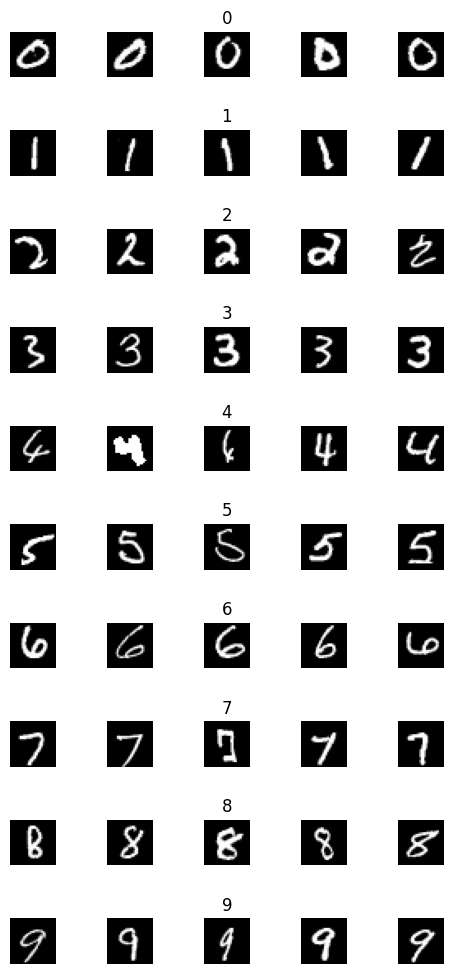

In [115]:
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


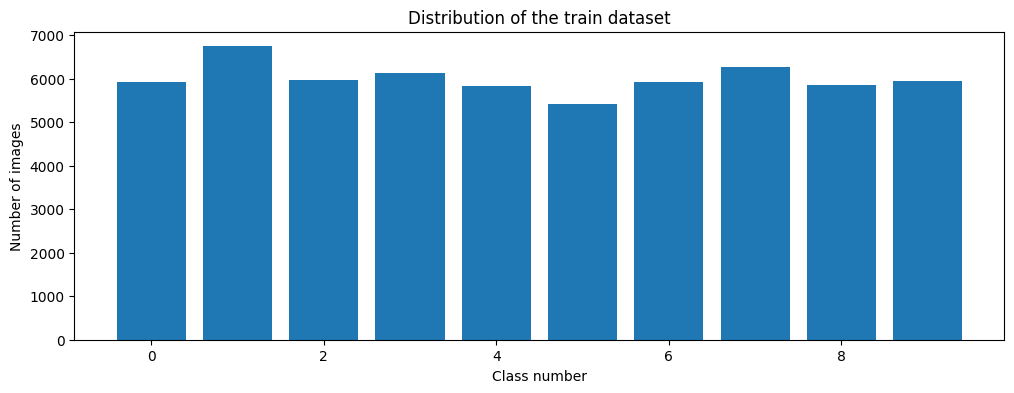

In [116]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [117]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [118]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [119]:
X_train = X_train/255
X_test = X_test/255

In [120]:
#define the lenet_model function
def lenet_model():
    model = Sequential()
    # model.add(Conv2D((30), (5,5), input_shape = (28, 28, 1), activation = 'relu', stride = , padding = ))
    model.add(Conv2D((30), (5,5), input_shape = (28, 28, 1), activation = 'relu', ))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D((15), (3,3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(500,  activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes,  activation = 'softmax'))
    model.compile(Adam(learning_rate=0.01), loss = 'categorical_crossentropy', metrics=['accuracy'])
    return model

In [121]:
model = lenet_model()
print(model.summary())

c:\Users\fadhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 24, 24, 30)     │           780 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 12, 12, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 10, 10, 15)     │         4,065 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 15)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 375)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 500)            │       188,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 197,855 (772.87 KB)

 Trainable params: 197,855 (772.87 KB)

 Non-trainable params: 0 (0.00 B)

None


In [122]:
h = model.fit(X_train, y_train, epochs = 10, validation_split=0.1, batch_size = 400, verbose=1, shuffle=1)

Epoch 1/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 0.8043 - loss: 0.5770 - val_accuracy: 0.9842 - val_loss: 0.0512
Epoch 2/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.9774 - loss: 0.0723 - val_accuracy: 0.9888 - val_loss: 0.0426
Epoch 3/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.9809 - loss: 0.0601 - val_accuracy: 0.9882 - val_loss: 0.0465
Epoch 4/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.9829 - loss: 0.0511 - val_accuracy: 0.9882 - val_loss: 0.0438
Epoch 5/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.9851 - loss: 0.0474 - val_accuracy: 0.9900 - val_loss: 0.0356
Epoch 6/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - accuracy: 0.9865 - loss: 0.0407 - val_accuracy: 0.9900 - val_loss: 0.0380
Epoch 7/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - accuracy: 0.9867 - loss: 0.0439 - val_accuracy: 0.9880 - val_loss: 0.0422
Epoch 8/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - accuracy: 0.9865 - loss: 0.0437 - val_acc

Text(0.5, 0, 'epoch')

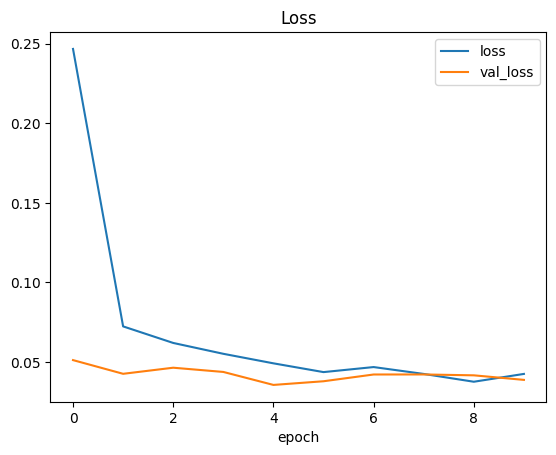

In [123]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

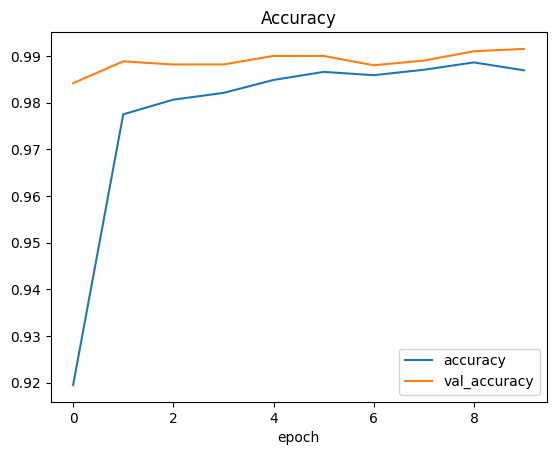

In [124]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

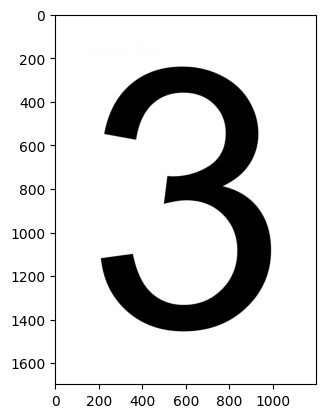

In [125]:
import requests
from PIL import Image

url = 'https://printables.space/files/uploads/download-and-print/large-printable-numbers/3-a4-1200x1697.jpg'
# url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'

response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)

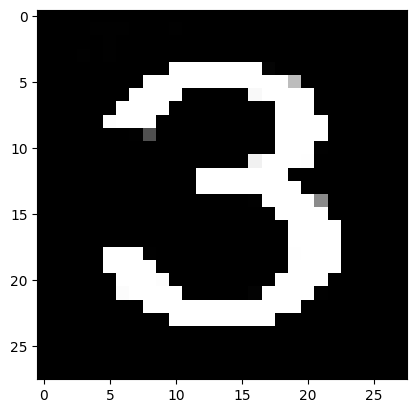

In [126]:
import cv2

img_array = np.asarray(img)
resized = cv2.resize(img_array, (28,28))
grayscale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(grayscale)
plt.imshow(image, cmap=plt.get_cmap("gray"))

In [127]:
image = image/255
image = image.reshape(1,28, 28,1)

In [128]:
prediction = np.argmax(model.predict(image), axis=1)
print('Predicted Digits :', str(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Predicted Digits : [3]


In [129]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test Score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test Score: 0.035336095839738846
Test accuracy: 0.9882000088691711


In [134]:
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)
visual_layer1, visual_layer2 = layer1.predict(image), layer2.predict(image)
# print(visual_layer1.shape)
# print(visual_layer2.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


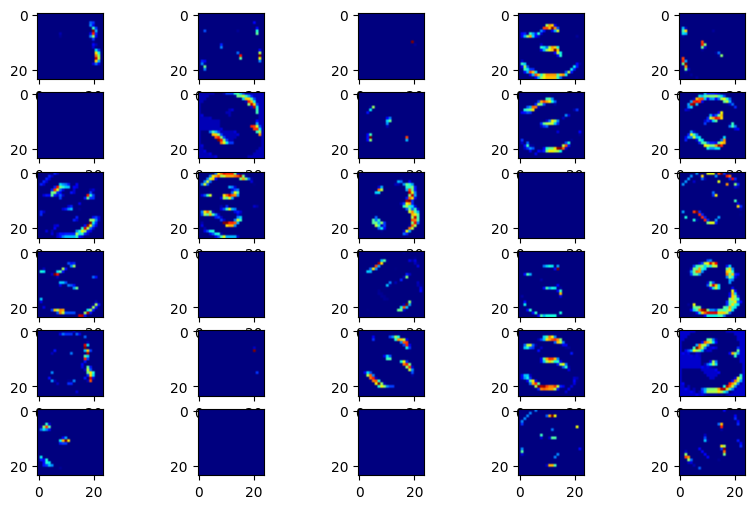

In [136]:
plt.figure(figsize=(10,6))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.imshow(visual_layer1[0, :, : ,i], cmap = plt.get_cmap('jet'))

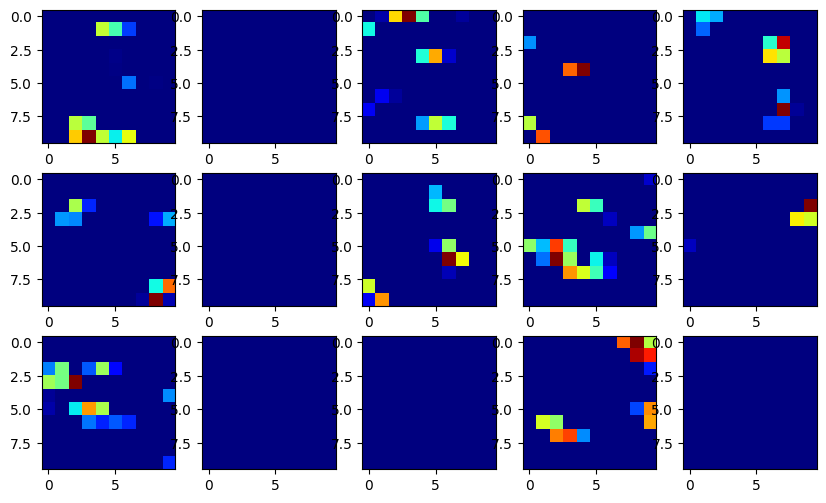

In [137]:
plt.figure(figsize=(10,6))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(visual_layer2[0, :, : ,i], cmap = plt.get_cmap('jet'))